In [1]:

import tensorflow as tf
import datetime
from tensorflow.keras import datasets, layers, models
from keras.callbacks import TensorBoard
from tensorflow.keras.layers import *
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import sklearn.metrics as metrics
from skopt.space import Real, Integer, Categorical
from skopt import gp_minimize
from skopt.utils import use_named_args
from tensorflow.python.keras.callbacks import EarlyStopping
from skopt import callbacks
from skopt.callbacks import CheckpointSaver
from tensorflow.keras.optimizers import *
import gc


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
assert train_images.shape == (50000, 32, 32, 3)
assert test_images.shape == (10000, 32, 32, 3)
assert train_labels.shape == (50000, 1)
assert test_labels.shape == (10000, 1)

In [3]:
x_train = train_images.astype('float32') / 255.
x_test = test_images.astype('float32') / 255.
y_train = keras.utils.to_categorical(train_labels, 10)
y_test = keras.utils.to_categorical(test_labels, 10)

In [4]:
datagen = ImageDataGenerator()
datagen.fit(x_train)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
train_images.shape

(50000, 32, 32, 3)

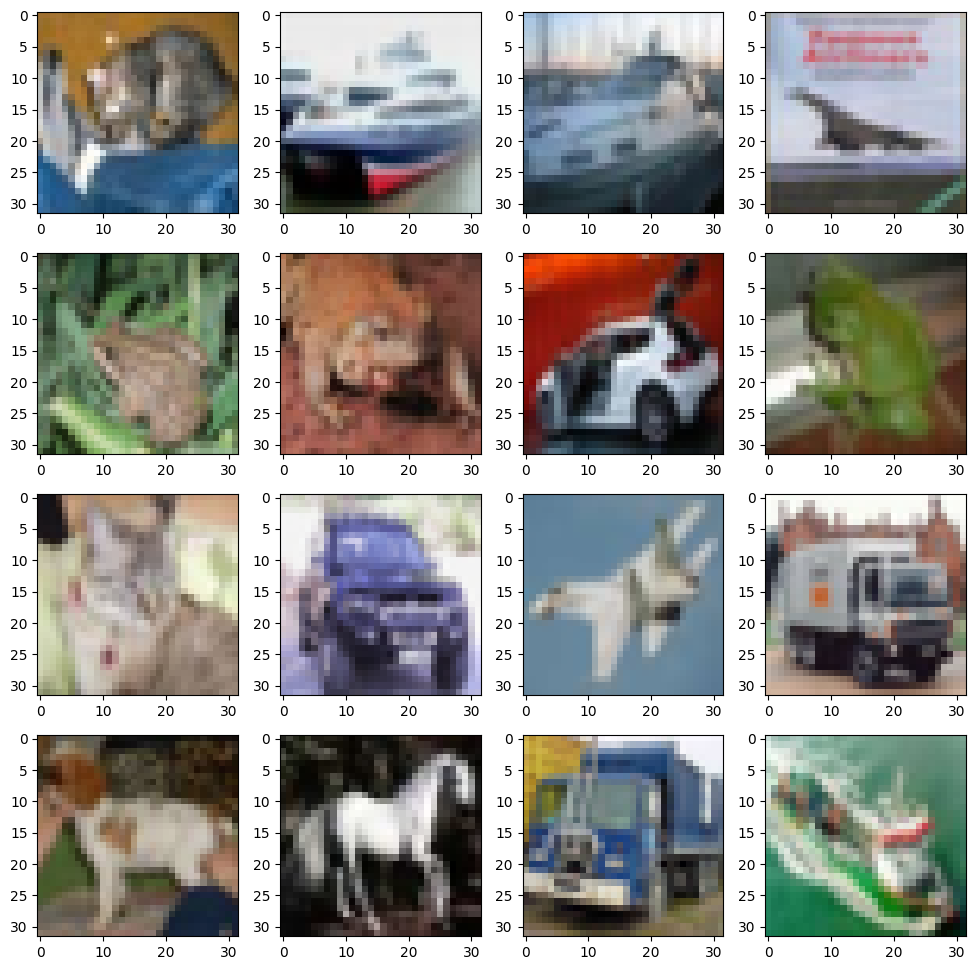

In [7]:
_, axs = plt.subplots(4, 4, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(test_images[0:16], axs):
    ax.imshow(img)

# Autoencoder

In [8]:
def autoencoder(optimizer):
    model = models.Sequential()
    model.add(Input(shape= (32,32,3)))
    model.add(Conv2D(32, (3,3), padding="same", strides = 1, activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(32, (3,3), padding="same", strides = 1, activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(32, (3,3), padding="same", strides = 1, activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Reshape(target_shape=(4, 4, 32)))
    model.add(Conv2DTranspose(8, (3,3), padding="same", strides = (2,2),activation='relu'))
    model.add(Conv2DTranspose(8, (3,3), padding="same", strides = (2,2),activation='relu')) 
    model.add(Conv2DTranspose(8, (3,3), padding="same", strides = (2,2),activation='relu')) 
    model.add(Conv2D(3, (3, 3), activation="sigmoid", padding="same"))
    model.compile(loss = 'mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])
    return model

In [9]:
keras.backend.clear_session()
model = autoencoder('SGD')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

In [10]:
log_dir = "Tensor_board/04_ev/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(
    log_dir='log_dir',
    histogram_freq=1,
    write_graph=True,
    write_grads=False,
    write_images=False)

history = model.fit_generator(datagen.flow(x_train, x_train, batch_size=1024),
                    epochs=100,
                    validation_data = (x_test, x_test),
                    shuffle=True,
                    callbacks=[tensorboard_callback])

C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_68392\2926474464.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, x_train, batch_size=1024),


Epoch 1/100
49/49 [==============================] - 23s 123ms/step - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.0637 - val_mean_squared_error: 0.0637
Epoch 2/100
49/49 [==============================] - 4s 84ms/step - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.0636 - val_mean_squared_error: 0.0636
Epoch 3/100
49/49 [==============================] - 4s 84ms/step - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.0636 - val_mean_squared_error: 0.0636
Epoch 4/100
49/49 [==============================] - 4s 85ms/step - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.0635 - val_mean_squared_error: 0.0635
Epoch 5/100
49/49 [==============================] - 4s 85ms/step - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.0635 - val_mean_squared_error: 0.0635
Epoch 6/100
49/49 [==============================] - 4s 83ms/step - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.0635 - val_mean_squared_error: 0.0635
Epoch 7/100
49/49 [=======

49/49 [==============================] - 4s 85ms/step - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0628 - val_mean_squared_error: 0.0628
Epoch 52/100
49/49 [==============================] - 4s 85ms/step - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0628 - val_mean_squared_error: 0.0628
Epoch 53/100
49/49 [==============================] - 4s 84ms/step - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0628 - val_mean_squared_error: 0.0628
Epoch 54/100
49/49 [==============================] - 4s 84ms/step - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0628 - val_mean_squared_error: 0.0628
Epoch 55/100
49/49 [==============================] - 4s 83ms/step - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0628 - val_mean_squared_error: 0.0628
Epoch 56/100
49/49 [==============================] - 4s 84ms/step - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0628 - val_mean_squared_error: 0.0628
Epoch 57/100
49/49 [===============

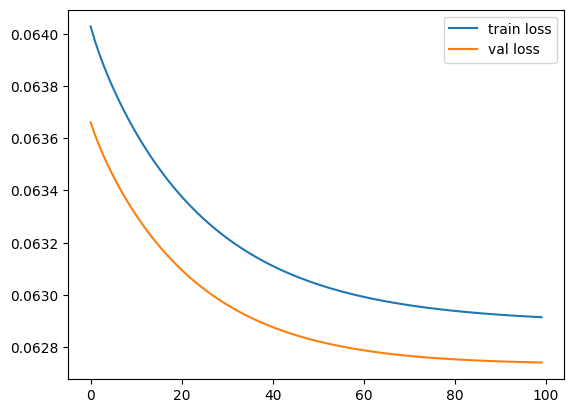

In [11]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

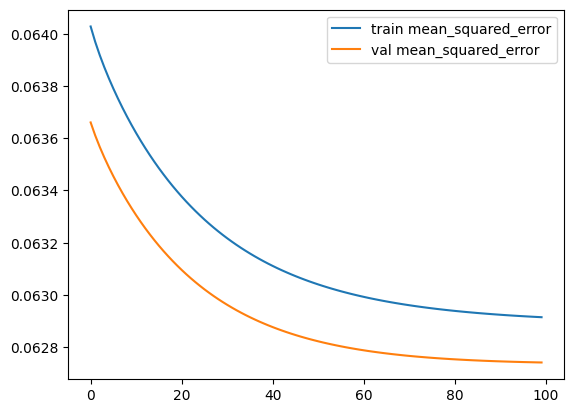

In [12]:
plt.plot(history.history['mean_squared_error'], label='train mean_squared_error')
plt.plot(history.history['val_mean_squared_error'], label='val mean_squared_error')
plt.legend()
plt.show()

In [15]:
decoded_imgs = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


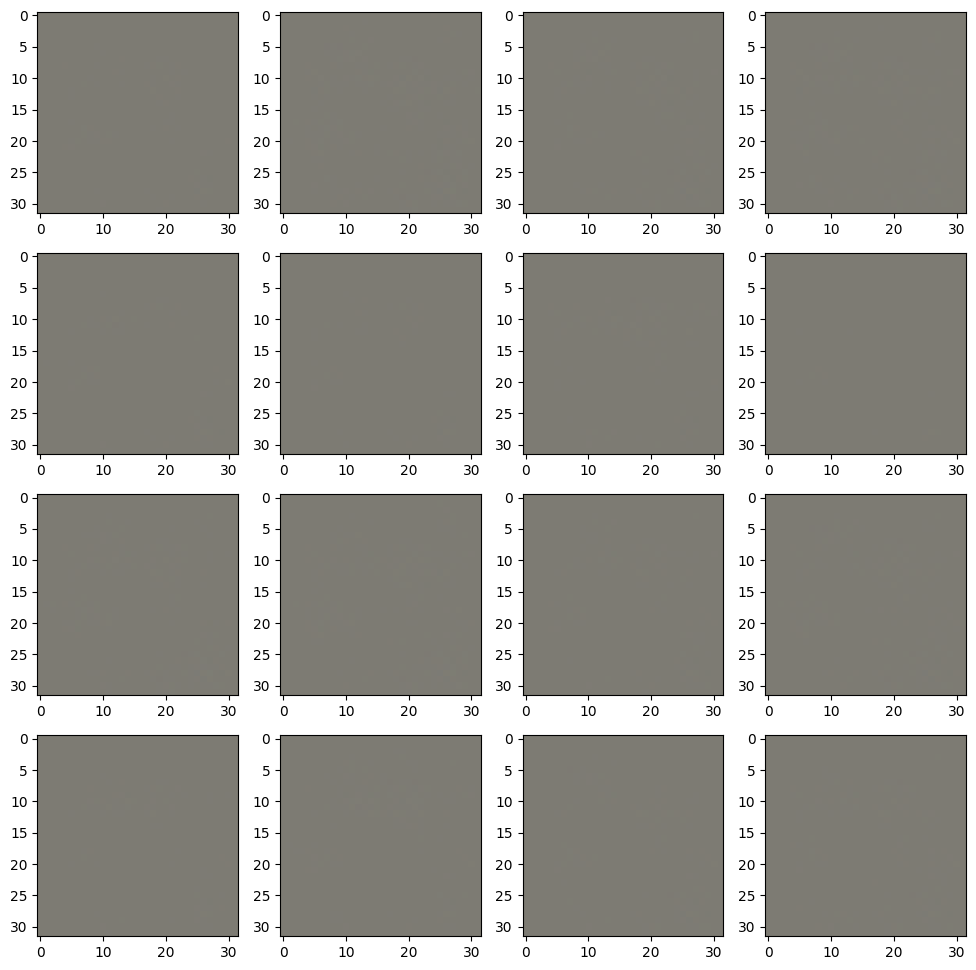

In [16]:
_, axs = plt.subplots(4, 4, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(decoded_imgs[0:16], axs):
    ax.imshow(img)

## Comment

### Zadany w zadaniu opimalizer nie pozwolił uzykać oczykiwanego efektu działania autoencodera. Poniżej działanie encodera przy wykorzystaniu optimizera "Adam"

In [15]:
keras.backend.clear_session()
model = autoencoder('Adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

In [22]:
log_dir = "Tensor_board/autoencoder/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(
    log_dir='log_dir',
    histogram_freq=1,
    write_graph=True,
    write_grads=False,
    write_images=False)

history = model.fit_generator(datagen.flow(x_train, x_train, batch_size=1024),
                    epochs=100,
                    validation_data = (x_test, x_test),
                    shuffle=True,
                    callbacks=[tensorboard_callback])

<ipython-input-22-17478f40e945>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, x_train, batch_size=1024),


Epoch 1/100
49/49 [==============================] - 7s 141ms/step - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 2/100
49/49 [==============================] - 4s 84ms/step - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 3/100
49/49 [==============================] - 5s 94ms/step - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 4/100
49/49 [==============================] - 4s 85ms/step - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 5/100
49/49 [==============================] - 5s 94ms/step - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 6/100
49/49 [==============================] - 4s 85ms/step - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 7/100
49/49 [========

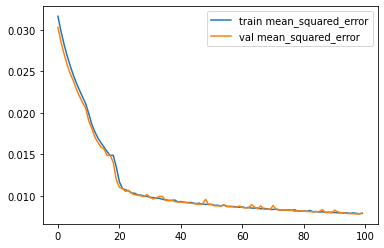

In [23]:
plt.plot(history.history['mean_squared_error'], label='train mean_squared_error')
plt.plot(history.history['val_mean_squared_error'], label='val mean_squared_error')
plt.legend()
plt.show()

In [24]:
decoded_imgs = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [25]:
decoded_imgs[0]

array([[[0.5140544 , 0.43055823, 0.2972795 ],
        [0.5463704 , 0.42470998, 0.26876512],
        [0.5305405 , 0.41791895, 0.2594311 ],
        ...,
        [0.52752507, 0.37973806, 0.2066484 ],
        [0.5084741 , 0.36519685, 0.1921861 ],
        [0.4396738 , 0.35795823, 0.23786044]],

       [[0.5522078 , 0.44536346, 0.28152388],
        [0.5931352 , 0.4308722 , 0.21757257],
        [0.5842012 , 0.42036748, 0.20512113],
        ...,
        [0.56268376, 0.37630764, 0.16081908],
        [0.5423364 , 0.3540217 , 0.1493706 ],
        [0.48609063, 0.36350298, 0.19948497]],

       [[0.5609984 , 0.45498157, 0.29175162],
        [0.60749304, 0.43527272, 0.22068009],
        [0.62998354, 0.45103526, 0.21607131],
        ...,
        [0.55197936, 0.374061  , 0.16474706],
        [0.5397008 , 0.35263753, 0.15694909],
        [0.4932767 , 0.38369182, 0.20433773]],

       ...,

       [[0.2904715 , 0.44814315, 0.59033644],
        [0.18911742, 0.3551916 , 0.5382285 ],
        [0.15629177, 0

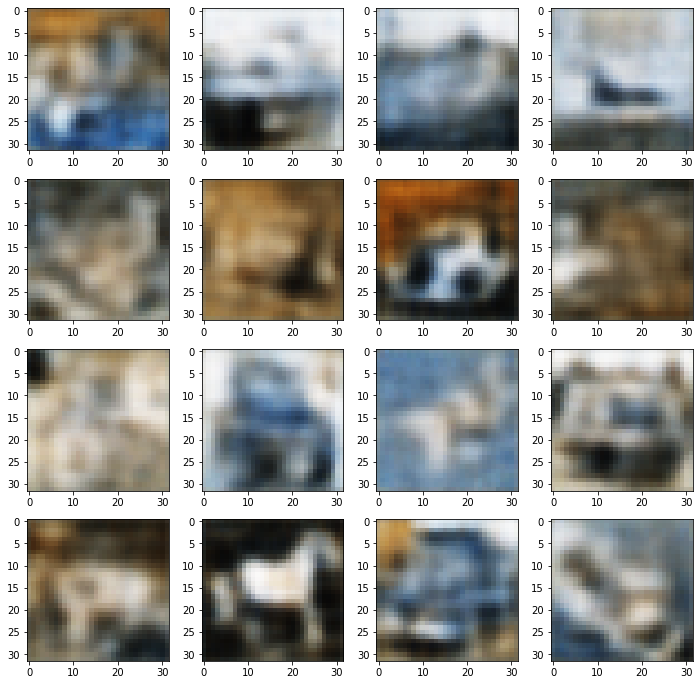

In [26]:
_, axs = plt.subplots(4, 4, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(decoded_imgs[0:16], axs):
    ax.imshow(img)

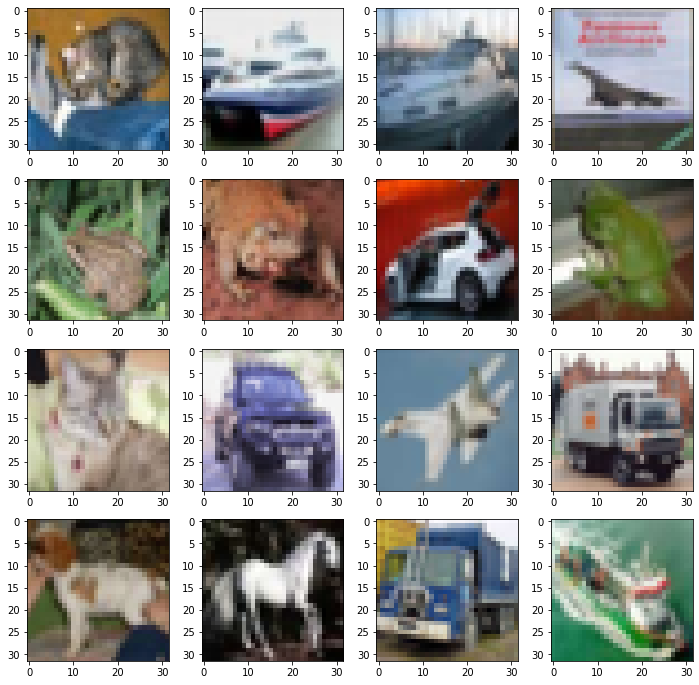

In [27]:
_, axs = plt.subplots(4, 4, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(x_test[0:16], axs):
    ax.imshow(img)

 ## Comment
 ### Przez wszystkie epoki odbywał się proces uczenia, nie wystąpiło zjawisko overfittingu ani underfittingu, błąd średniokwadratowy dla zbioru uczącego i walidaccyjnego cały czas obniżał się. Udało się uzyskać oczekiwany wynik, zrekonstruowane obrazy są "zamglonymi" odpowiednikami obrazów orginalnych.

# Klasyfikator

In [28]:
autoencoder = model


In [29]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

In [43]:
def classificator():
    model = models.Sequential()
    for layer in autoencoder.layers[0:7]:
        layer.trainable=False
        model.add(layer)
    model.add(Dense(128, activation='relu', name = 'dense1'))
    model.add(Dense(10, activation='softmax', name = 'dense2'))
    model.compile(loss = 'categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

In [44]:
keras.backend.clear_session()
model = classificator()

In [45]:
log_dir = "Tensor_board/classificator/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(
    log_dir='log_dir',
    histogram_freq=1,
    write_graph=True,
    write_grads=False,
    write_images=False)

history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    epochs=100,
                    validation_data = (x_test, y_test),
                    shuffle=True,
                    callbacks=[tensorboard_callback])

Epoch 1/100


<ipython-input-45-20d7e11ee34a>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),


391/391 [==============================] - 5s 11ms/step - loss: 1.9743 - accuracy: 0.2918 - val_loss: 1.8412 - val_accuracy: 0.3443
Epoch 2/100
391/391 [==============================] - 4s 10ms/step - loss: 1.7682 - accuracy: 0.3735 - val_loss: 1.7046 - val_accuracy: 0.3993
Epoch 3/100
391/391 [==============================] - 4s 10ms/step - loss: 1.6875 - accuracy: 0.4024 - val_loss: 1.6507 - val_accuracy: 0.4203
Epoch 4/100
391/391 [==============================] - 4s 11ms/step - loss: 1.6309 - accuracy: 0.4219 - val_loss: 1.6046 - val_accuracy: 0.4228
Epoch 5/100
391/391 [==============================] - 4s 11ms/step - loss: 1.5895 - accuracy: 0.4346 - val_loss: 1.5653 - val_accuracy: 0.4452
Epoch 6/100
391/391 [==============================] - 4s 10ms/step - loss: 1.5586 - accuracy: 0.4465 - val_loss: 1.5435 - val_accuracy: 0.4503
Epoch 7/100
391/391 [==============================] - 4s 10ms/step - loss: 1.5341 - accuracy: 0.4532 - val_loss: 1.5589 - val_accuracy: 0.4421
Epoc

In [46]:
import numpy
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
predictions = model.predict(x_test)
predicted_classes = numpy.argmax(predictions, axis=1)
report = classification_report(test_labels, predicted_classes)
print(report)

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.56      0.72      0.63      1000
           1       0.68      0.67      0.67      1000
           2       0.46      0.42      0.44      1000
           3       0.44      0.26      0.33      1000
           4       0.44      0.56      0.49      1000
           5       0.49      0.50      0.50      1000
           6       0.57      0.66      0.61      1000
           7       0.65      0.60      0.62      1000
           8       0.68      0.69      0.68      1000
           9       0.67      0.57      0.62      1000

    accuracy                           0.56     10000
   macro avg       0.56      0.56      0.56     10000
weighted avg       0.56      0.56      0.56     10000



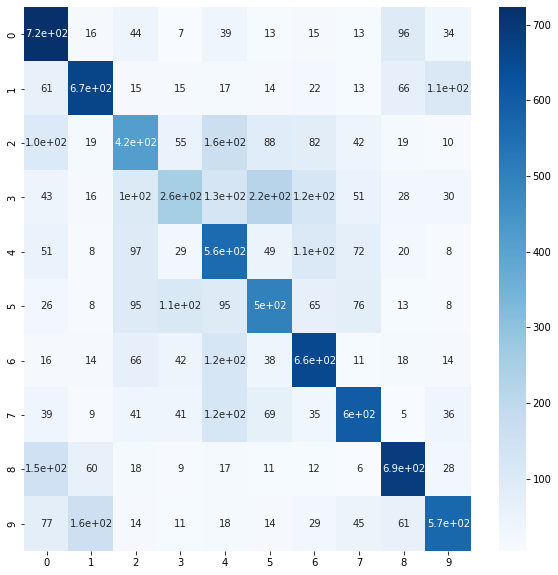

In [47]:
cf= confusion_matrix(test_labels, predicted_classes)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(cf, annot=True, cmap='Blues', ax=ax)

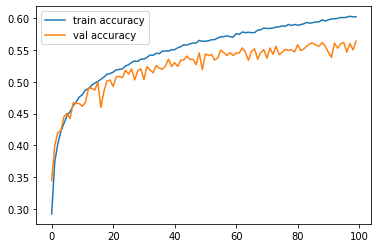

In [48]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

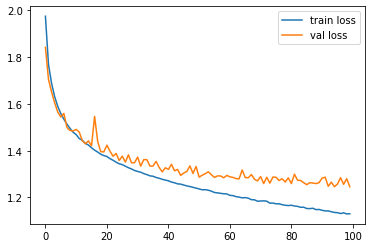

In [49]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

## Comment
### Model uzyskał niską dokładność na poziome  56%. Metryka accuracy wskazuje na to, że model często popełnia błędy w klasyfikacji zwłaszcza dla klas 2,3 i 5. Możliwe że przyuczenie modelu dla większej liczby epok pozwoliłoby na uzyskanie lepszego wyniku. We procesie uczenia nastąpiło zjawisko overfittingu, utrata dla zbioru uczącego jest dużo niższa niż dla zbioru walidacyjnego. Zastosowanie augumentacji danych uczących mogłoby pomóc zmiejszyć zjawisko overfittingu

# Classification corrected -> finding best model

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
assert train_images.shape == (50000, 32, 32, 3)
assert test_images.shape == (10000, 32, 32, 3)
assert train_labels.shape == (50000, 1)
assert test_labels.shape == (10000, 1)

In [3]:
x_train = train_images.astype('float32') / 255.
x_test = test_images.astype('float32') / 255.
y_train = keras.utils.to_categorical(train_labels, 10)
y_test = keras.utils.to_categorical(test_labels, 10)

In [4]:
datagen = ImageDataGenerator(
        zoom_range = 0.2, 
        width_shift_range=0.2,
        height_shift_range=0.2, )
datagen.fit(x_train)

In [5]:
dim_num_filters = Integer(low=4, high=128, name='num_filters')
dim_num_layers  =  Integer(low=1, high=3, name='num_layers')

dim_num_dense_nodes = Integer(low=256, high=3000, name='num_dense_nodes')
dim_num_dense_layers  =  Integer(low=1, high=5, name='num_dense_layers')

dim_activation = Categorical(categories=['sigmoid', 'tanh', 'softplus', 'softmax', 'relu'],
                             name='activation')
dim_dropout = Real(low=0.01, high=0.4, name='dropout')
dim_init = Categorical(
    categories=['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal',
                'he_uniform'], name='kernel_initializer')
dim_optimizer = Categorical(categories=['RMSprop', 'Adam',  'Nadam', 'Adamax', 'SGD'], name='optimizer')
dim_loss = Categorical(categories=['categorical_crossentropy', 'categorical_hinge', 'mean_squared_error', 'huber_loss'],
                       name='loss')


In [6]:
dimensions = [dim_num_filters,
              dim_num_layers,
              dim_num_dense_nodes,
              dim_num_dense_layers,
              dim_activation,
              dim_dropout,
              dim_init,
              dim_optimizer,
              dim_loss]

In [7]:
default_parameters = [
 32,
 2, 
 1024,
 2,
 'relu',
 0.05,
 'he_normal',
 'Adam',
 'categorical_crossentropy']

In [8]:
def create_model( num_filters, num_layers, num_dense_nodes, num_dense_layers, activation, dropout, kernel_initializer, optimizer, loss):
    model = models.Sequential()
    model.add(Input(shape= (32,32,3)))
    for i in range(num_layers):
        model.add(Conv2D(num_filters, (3,3), padding="same", strides = 1, activation="relu"))
        model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(512))
    for i in range(num_dense_layers):
        name = 'layer_dense_{0}'.format(i + 1)
        model.add(Dense(num_dense_nodes,
                        kernel_initializer=kernel_initializer,
                        activation=activation,
                        name=name))
        num_dense_nodes = num_dense_nodes // 2
        model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss=loss, optimizer=get_optimizer(optimizer), metrics=['accuracy'])
    return model

In [9]:
def get_optimizer(opt):
    if opt == 'RMSprop':
        optimizer = RMSprop(learning_rate=0.001)
    if opt == 'Adam':
        optimizer = Adam(learning_rate=0.001)
    if opt == 'SGD':
        optimizer = SGD(learning_rate=0.001)
    if opt == 'Nadam':
        optimizer = Nadam()
    if opt == 'Adamax':
        optimizer = Adamax(learning_rate=0.001)
    return optimizer

In [10]:
best_accuracy = 0.0
@use_named_args(dimensions=dimensions)
def fitness(num_filters, num_layers, num_dense_nodes, num_dense_layers, activation, dropout, kernel_initializer, optimizer, loss):
    # Print the hyper-parameters.
    print('num_filters:', num_filters)
    print('num_layers', num_layers)
    print('num_dense_nodes:', num_dense_nodes)
    print('num_dense_layers', num_dense_layers)
    print('activation:', activation)
    print('dropout:', dropout)
    print('kernel_initializer', kernel_initializer)
    print('optimizer:', optimizer)
    print('loss:', loss)
    print()
    tf.random.set_seed(3)
    model = create_model(num_filters = num_filters , num_layers= num_layers,
                        num_dense_nodes=num_dense_nodes,
                         num_dense_layers=num_dense_layers,
                         activation=activation,
                         dropout=dropout,
                         kernel_initializer=kernel_initializer,
                         optimizer=optimizer,
                         loss=loss)


    es = EarlyStopping(monitor='val_loss', mode='min', patience=10, min_delta=0.0001, verbose=1, restore_best_weights=True)
    es_acc = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, min_delta=0.00001, verbose=1, restore_best_weights=True)
    
    history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),
                                  epochs=100,
                                  shuffle=True,
                                  validation_data = (x_test, y_test),
                                  callbacks=[es, es_acc])

    accuracy = history.history['val_accuracy'][-1]

    # Print the classification accuracy.
    print()
    print("Accuracy: {0:.2%}".format(accuracy))
    print()

    global best_accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy

    del model
    gc.collect()
    keras.backend.clear_session()
    return -accuracy

In [11]:
checkpoint_saver = CheckpointSaver("./checkpoint.pkl", compress=9)

In [12]:
search_result = gp_minimize(func=fitness,
                            dimensions=dimensions,
                            acq_func='EI',
                            n_calls=30,
                            x0=default_parameters, verbose=True)

Iteration No: 1 started. Evaluating function at provided point.
num_filters: 32
num_layers 2
num_dense_nodes: 1024
num_dense_layers 2
activation: relu
dropout: 0.05
kernel_initializer he_normal
optimizer: Adam
loss: categorical_crossentropy

Epoch 1/100


C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1299040212.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),


782/782 [==============================] - 25s 25ms/step - loss: 1.6949 - accuracy: 0.3941 - val_loss: 1.7272 - val_accuracy: 0.4143
Epoch 2/100
782/782 [==============================] - 18s 23ms/step - loss: 1.4483 - accuracy: 0.4786 - val_loss: 1.6347 - val_accuracy: 0.4905
Epoch 3/100
782/782 [==============================] - 18s 23ms/step - loss: 1.3386 - accuracy: 0.5229 - val_loss: 1.7384 - val_accuracy: 0.4705
Epoch 4/100
782/782 [==============================] - 18s 23ms/step - loss: 1.2676 - accuracy: 0.5472 - val_loss: 1.1643 - val_accuracy: 0.5896
Epoch 5/100
782/782 [==============================] - 18s 23ms/step - loss: 1.2060 - accuracy: 0.5681 - val_loss: 1.2643 - val_accuracy: 0.5782
Epoch 6/100
782/782 [==============================] - 19s 24ms/step - loss: 1.1625 - accuracy: 0.5873 - val_loss: 1.1144 - val_accuracy: 0.6247
Epoch 7/100
782/782 [==============================] - 18s 23ms/step - loss: 1.1286 - accuracy: 0.5976 - val_loss: 2.0994 - val_accuracy: 0.44

Epoch 2/100
782/782 [==============================] - 19s 25ms/step - loss: 1.4927 - accuracy: 0.4633 - val_loss: 1.4564 - val_accuracy: 0.4899
Epoch 3/100
782/782 [==============================] - 18s 23ms/step - loss: 1.4069 - accuracy: 0.4940 - val_loss: 1.3427 - val_accuracy: 0.5284
Epoch 4/100
782/782 [==============================] - 18s 23ms/step - loss: 1.3505 - accuracy: 0.5168 - val_loss: 1.3069 - val_accuracy: 0.5456
Epoch 5/100
782/782 [==============================] - 18s 23ms/step - loss: 1.3098 - accuracy: 0.5316 - val_loss: 1.6122 - val_accuracy: 0.4967
Epoch 6/100
782/782 [==============================] - 18s 23ms/step - loss: 1.2777 - accuracy: 0.5481 - val_loss: 1.3486 - val_accuracy: 0.5456
Epoch 7/100
782/782 [==============================] - 18s 23ms/step - loss: 1.2499 - accuracy: 0.5546 - val_loss: 1.2374 - val_accuracy: 0.5802
Epoch 8/100
782/782 [==============================] - 18s 23ms/step - loss: 1.2244 - accuracy: 0.5655 - val_loss: 1.2312 - val_ac

782/782 [==============================] - 18s 23ms/step - loss: 0.0306 - accuracy: 0.5313 - val_loss: 0.0312 - val_accuracy: 0.5471
Epoch 12/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0301 - accuracy: 0.5397 - val_loss: 0.0346 - val_accuracy: 0.4830
Epoch 13/100
782/782 [==============================] - 18s 24ms/step - loss: 0.0296 - accuracy: 0.5458 - val_loss: 0.0374 - val_accuracy: 0.4519
Epoch 14/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0291 - accuracy: 0.5531 - val_loss: 0.0322 - val_accuracy: 0.5390
Epoch 15/100
782/782 [==============================] - 19s 24ms/step - loss: 0.0287 - accuracy: 0.5615 - val_loss: 0.0292 - val_accuracy: 0.5726
Epoch 16/100
782/782 [==============================] - 18s 24ms/step - loss: 0.0283 - accuracy: 0.5665 - val_loss: 0.0350 - val_accuracy: 0.4959
Epoch 17/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0284 - accuracy: 0.5655 - val_loss: 0.0313 - val_accuracy

Epoch 23/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0234 - accuracy: 0.6524 - val_loss: 0.0241 - val_accuracy: 0.6470
Epoch 24/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0232 - accuracy: 0.6557 - val_loss: 0.0248 - val_accuracy: 0.6363
Epoch 25/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0230 - accuracy: 0.6592 - val_loss: 0.0213 - val_accuracy: 0.6863
Epoch 26/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0230 - accuracy: 0.6581 - val_loss: 0.0221 - val_accuracy: 0.6753
Epoch 27/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0226 - accuracy: 0.6651 - val_loss: 0.0263 - val_accuracy: 0.6160
Epoch 28/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0223 - accuracy: 0.6697 - val_loss: 0.0233 - val_accuracy: 0.6582
Epoch 29/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0223 - accuracy: 0.6734 - val_loss: 0.0306 -

Epoch 1/100
782/782 [==============================] - 32s 38ms/step - loss: 1.0900 - accuracy: 0.1086 - val_loss: 1.7028 - val_accuracy: 0.1000
Epoch 2/100
782/782 [==============================] - 29s 37ms/step - loss: 1.0005 - accuracy: 0.1001 - val_loss: 1.8000 - val_accuracy: 0.1000
Epoch 3/100
782/782 [==============================] - 29s 37ms/step - loss: 1.0004 - accuracy: 0.1014 - val_loss: 1.8000 - val_accuracy: 0.1000
Epoch 4/100
782/782 [==============================] - 29s 37ms/step - loss: 1.0004 - accuracy: 0.0990 - val_loss: 1.8000 - val_accuracy: 0.1000
Epoch 5/100
782/782 [==============================] - 29s 37ms/step - loss: 1.0003 - accuracy: 0.0989 - val_loss: 1.7973 - val_accuracy: 0.1000
Epoch 6/100
782/782 [==============================] - 29s 37ms/step - loss: 1.0003 - accuracy: 0.1027 - val_loss: 1.8000 - val_accuracy: 0.1000
Epoch 7/100
782/782 [==============================] - 29s 37ms/step - loss: 1.0003 - accuracy: 0.0999 - val_loss: 1.8000 - val_ac

Epoch 00012: early stopping
Epoch 00012: early stopping

Accuracy: 10.00%

Iteration No: 9 ended. Evaluation done at random point.
Time taken: 221.0384
Function value obtained: -0.1000
Current minimum: -0.6923
Iteration No: 10 started. Evaluating function at random point.
num_filters: 21
num_layers 2
num_dense_nodes: 744
num_dense_layers 2
activation: sigmoid
dropout: 0.049504017704893676
kernel_initializer normal
optimizer: Adamax
loss: categorical_hinge

Epoch 1/100
782/782 [==============================] - 19s 23ms/step - loss: 1.0627 - accuracy: 0.2855 - val_loss: 0.9791 - val_accuracy: 0.4268
Epoch 2/100
782/782 [==============================] - 18s 23ms/step - loss: 0.9898 - accuracy: 0.4082 - val_loss: 0.9813 - val_accuracy: 0.4311
Epoch 3/100
782/782 [==============================] - 18s 23ms/step - loss: 0.9417 - accuracy: 0.4577 - val_loss: 0.8482 - val_accuracy: 0.5273
Epoch 4/100
782/782 [==============================] - 18s 23ms/step - loss: 0.9132 - accuracy: 0.4807 -

782/782 [==============================] - 26s 33ms/step - loss: 1.0002 - accuracy: 0.0960 - val_loss: 1.0002 - val_accuracy: 0.1000
Epoch 9/100
782/782 [==============================] - 25s 32ms/step - loss: 1.0002 - accuracy: 0.0996 - val_loss: 1.0001 - val_accuracy: 0.1000
Epoch 10/100
782/782 [==============================] - 25s 32ms/step - loss: 1.0002 - accuracy: 0.1014 - val_loss: 1.0003 - val_accuracy: 0.1000
Epoch 11/100
781/782 [============================>.] - ETA: 0s - loss: 1.0002 - accuracy: 0.0996Restoring model weights from the end of the best epoch.
Restoring model weights from the end of the best epoch.
782/782 [==============================] - 25s 33ms/step - loss: 1.0002 - accuracy: 0.0996 - val_loss: 1.0002 - val_accuracy: 0.1000
Epoch 00011: early stopping
Epoch 00011: early stopping

Accuracy: 10.00%

Iteration No: 11 ended. Evaluation done at random point.
Time taken: 282.3355
Function value obtained: -0.1000
Current minimum: -0.6923
Iteration No: 12 starte

C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1299040212.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),


782/782 [==============================] - 20s 24ms/step - loss: 1.0001 - accuracy: 0.2741 - val_loss: 1.0004 - val_accuracy: 0.1425
Epoch 2/100
782/782 [==============================] - 18s 23ms/step - loss: 1.0001 - accuracy: 0.1691 - val_loss: 1.0001 - val_accuracy: 0.1000
Epoch 3/100
782/782 [==============================] - 20s 25ms/step - loss: 1.0001 - accuracy: 0.0997 - val_loss: 1.0001 - val_accuracy: 0.1000
Epoch 4/100
782/782 [==============================] - 18s 23ms/step - loss: 1.0001 - accuracy: 0.0993 - val_loss: 1.0000 - val_accuracy: 0.1000
Epoch 5/100
782/782 [==============================] - 18s 23ms/step - loss: 1.0001 - accuracy: 0.1002 - val_loss: 1.0001 - val_accuracy: 0.1000
Epoch 6/100
782/782 [==============================] - 19s 24ms/step - loss: 1.0001 - accuracy: 0.1004 - val_loss: 1.0001 - val_accuracy: 0.1000
Epoch 7/100
782/782 [==============================] - 19s 24ms/step - loss: 1.0000 - accuracy: 0.1009 - val_loss: 1.0000 - val_accuracy: 0.10

C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1299040212.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),


782/782 [==============================] - 19s 23ms/step - loss: 1.0319 - accuracy: 0.1360 - val_loss: 1.0016 - val_accuracy: 0.1004
Epoch 2/100
782/782 [==============================] - 18s 23ms/step - loss: 1.0003 - accuracy: 0.1063 - val_loss: 1.0004 - val_accuracy: 0.1032
Epoch 3/100
782/782 [==============================] - 18s 23ms/step - loss: 1.0003 - accuracy: 0.1021 - val_loss: 1.0004 - val_accuracy: 0.1017
Epoch 4/100
782/782 [==============================] - 18s 23ms/step - loss: 1.0004 - accuracy: 0.1041 - val_loss: 1.0003 - val_accuracy: 0.1015
Epoch 5/100
782/782 [==============================] - 18s 23ms/step - loss: 1.0004 - accuracy: 0.1004 - val_loss: 1.0010 - val_accuracy: 0.0999
Epoch 6/100
782/782 [==============================] - 18s 23ms/step - loss: 1.0004 - accuracy: 0.1028 - val_loss: 1.0006 - val_accuracy: 0.1001
Epoch 7/100
782/782 [==============================] - 19s 24ms/step - loss: 1.0003 - accuracy: 0.1017 - val_loss: 1.0006 - val_accuracy: 0.10

C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1299040212.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),


782/782 [==============================] - 23s 28ms/step - loss: 0.0450 - accuracy: 0.0991 - val_loss: 0.0450 - val_accuracy: 0.1000
Epoch 2/100
782/782 [==============================] - 21s 27ms/step - loss: 0.0450 - accuracy: 0.0998 - val_loss: 0.0450 - val_accuracy: 0.1000
Epoch 3/100
782/782 [==============================] - 21s 27ms/step - loss: 0.0450 - accuracy: 0.0991 - val_loss: 0.0450 - val_accuracy: 0.1000
Epoch 4/100
782/782 [==============================] - 21s 27ms/step - loss: 0.0450 - accuracy: 0.1007 - val_loss: 0.0450 - val_accuracy: 0.1000
Epoch 5/100
782/782 [==============================] - 21s 27ms/step - loss: 0.0450 - accuracy: 0.1005 - val_loss: 0.0450 - val_accuracy: 0.1000
Epoch 6/100
782/782 [==============================] - 21s 27ms/step - loss: 0.0450 - accuracy: 0.0987 - val_loss: 0.0450 - val_accuracy: 0.1000
Epoch 7/100
782/782 [==============================] - 21s 27ms/step - loss: 0.0450 - accuracy: 0.1023 - val_loss: 0.0450 - val_accuracy: 0.10

C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1299040212.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),


782/782 [==============================] - 22s 26ms/step - loss: 2.3033 - accuracy: 0.0992 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/100
782/782 [==============================] - 20s 25ms/step - loss: 2.3034 - accuracy: 0.0979 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/100
782/782 [==============================] - 19s 25ms/step - loss: 2.3034 - accuracy: 0.0976 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 4/100
782/782 [==============================] - 19s 25ms/step - loss: 2.3031 - accuracy: 0.1013 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 5/100
782/782 [==============================] - 20s 25ms/step - loss: 2.3034 - accuracy: 0.0998 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 6/100
782/782 [==============================] - 19s 25ms/step - loss: 2.3033 - accuracy: 0.1001 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/100
782/782 [==============================] - 19s 25ms/step - loss: 2.3034 - accuracy: 0.1007 - val_loss: 2.3029 - val_accuracy: 0.10

C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1299040212.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),


782/782 [==============================] - 21s 25ms/step - loss: 1.6896 - accuracy: 0.3999 - val_loss: 2.1675 - val_accuracy: 0.3698
Epoch 2/100
782/782 [==============================] - 18s 23ms/step - loss: 1.3665 - accuracy: 0.5138 - val_loss: 1.5064 - val_accuracy: 0.5377
Epoch 3/100
782/782 [==============================] - 18s 23ms/step - loss: 1.2429 - accuracy: 0.5602 - val_loss: 1.5943 - val_accuracy: 0.5307
Epoch 4/100
782/782 [==============================] - 19s 24ms/step - loss: 1.1643 - accuracy: 0.5868 - val_loss: 1.3102 - val_accuracy: 0.5691
Epoch 5/100
782/782 [==============================] - 18s 23ms/step - loss: 1.1018 - accuracy: 0.6087 - val_loss: 1.2241 - val_accuracy: 0.5926
Epoch 6/100
782/782 [==============================] - 18s 23ms/step - loss: 1.0645 - accuracy: 0.6251 - val_loss: 1.0281 - val_accuracy: 0.6558
Epoch 7/100
782/782 [==============================] - 19s 25ms/step - loss: 1.0160 - accuracy: 0.6408 - val_loss: 1.1041 - val_accuracy: 0.63

C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1299040212.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),


782/782 [==============================] - 19s 23ms/step - loss: 1.0216 - accuracy: 0.2654 - val_loss: 1.1872 - val_accuracy: 0.1660
Epoch 2/100
782/782 [==============================] - 19s 24ms/step - loss: 1.0052 - accuracy: 0.3424 - val_loss: 1.0353 - val_accuracy: 0.3421
Epoch 3/100
782/782 [==============================] - 18s 23ms/step - loss: 0.9759 - accuracy: 0.3757 - val_loss: 0.9206 - val_accuracy: 0.4366
Epoch 4/100
782/782 [==============================] - 18s 23ms/step - loss: 0.9510 - accuracy: 0.3934 - val_loss: 0.9592 - val_accuracy: 0.3798
Epoch 5/100
782/782 [==============================] - 18s 23ms/step - loss: 0.9344 - accuracy: 0.4085 - val_loss: 0.9487 - val_accuracy: 0.4189
Epoch 6/100
782/782 [==============================] - 19s 24ms/step - loss: 0.9291 - accuracy: 0.4088 - val_loss: 0.9425 - val_accuracy: 0.4295
Epoch 7/100
782/782 [==============================] - 18s 24ms/step - loss: 0.9178 - accuracy: 0.4156 - val_loss: 0.9004 - val_accuracy: 0.43

C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1299040212.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),


782/782 [==============================] - 19s 23ms/step - loss: 2.3030 - accuracy: 0.0966 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/100
782/782 [==============================] - 18s 23ms/step - loss: 2.3031 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/100
782/782 [==============================] - 18s 23ms/step - loss: 2.3029 - accuracy: 0.0996 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 4/100
782/782 [==============================] - 18s 23ms/step - loss: 2.3030 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/100
782/782 [==============================] - 18s 23ms/step - loss: 2.3029 - accuracy: 0.1005 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/100
782/782 [==============================] - 18s 23ms/step - loss: 2.3030 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/100
782/782 [==============================] - 18s 23ms/step - loss: 2.3029 - accuracy: 0.0979 - val_loss: 2.3028 - val_accuracy: 0.10

C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1299040212.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),


782/782 [==============================] - 20s 24ms/step - loss: 1.7700 - accuracy: 0.3618 - val_loss: 1.7182 - val_accuracy: 0.4099
Epoch 2/100
782/782 [==============================] - 18s 23ms/step - loss: 1.5491 - accuracy: 0.4396 - val_loss: 1.5770 - val_accuracy: 0.4543
Epoch 3/100
782/782 [==============================] - 19s 24ms/step - loss: 1.4608 - accuracy: 0.4728 - val_loss: 1.3561 - val_accuracy: 0.5125
Epoch 4/100
782/782 [==============================] - 18s 23ms/step - loss: 1.4048 - accuracy: 0.4924 - val_loss: 1.4225 - val_accuracy: 0.4792
Epoch 5/100
782/782 [==============================] - 18s 23ms/step - loss: 1.3631 - accuracy: 0.5075 - val_loss: 1.3270 - val_accuracy: 0.5236
Epoch 6/100
782/782 [==============================] - 18s 23ms/step - loss: 1.3227 - accuracy: 0.5252 - val_loss: 1.5010 - val_accuracy: 0.4971
Epoch 7/100
782/782 [==============================] - 18s 23ms/step - loss: 1.2987 - accuracy: 0.5308 - val_loss: 1.3012 - val_accuracy: 0.54

C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1299040212.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),


782/782 [==============================] - 21s 26ms/step - loss: 1.0000 - accuracy: 0.2970 - val_loss: 1.0002 - val_accuracy: 0.2766
Epoch 2/100
782/782 [==============================] - 18s 23ms/step - loss: 0.9804 - accuracy: 0.3502 - val_loss: 0.9586 - val_accuracy: 0.4123
Epoch 3/100
782/782 [==============================] - 18s 23ms/step - loss: 0.9531 - accuracy: 0.3728 - val_loss: 0.9369 - val_accuracy: 0.3935
Epoch 4/100
782/782 [==============================] - 19s 25ms/step - loss: 0.9313 - accuracy: 0.3955 - val_loss: 0.8812 - val_accuracy: 0.4620
Epoch 5/100
782/782 [==============================] - 18s 24ms/step - loss: 0.9037 - accuracy: 0.4166 - val_loss: 0.8323 - val_accuracy: 0.4901
Epoch 6/100
782/782 [==============================] - 18s 23ms/step - loss: 0.8692 - accuracy: 0.4382 - val_loss: 0.8008 - val_accuracy: 0.5081
Epoch 7/100
782/782 [==============================] - 18s 23ms/step - loss: 0.8440 - accuracy: 0.4460 - val_loss: 0.8711 - val_accuracy: 0.46

782/782 [==============================] - 19s 24ms/step - loss: 0.6545 - accuracy: 0.5948 - val_loss: 0.6418 - val_accuracy: 0.6441
Epoch 58/100
782/782 [==============================] - 18s 23ms/step - loss: 0.6497 - accuracy: 0.5987 - val_loss: 0.6603 - val_accuracy: 0.6287
Epoch 59/100
782/782 [==============================] - 19s 24ms/step - loss: 0.6501 - accuracy: 0.6006 - val_loss: 0.6240 - val_accuracy: 0.6512
Epoch 60/100
782/782 [==============================] - 19s 24ms/step - loss: 0.6466 - accuracy: 0.6014 - val_loss: 0.6463 - val_accuracy: 0.6466
Epoch 61/100
782/782 [==============================] - 18s 23ms/step - loss: 0.6457 - accuracy: 0.6067 - val_loss: 0.6402 - val_accuracy: 0.6491
Epoch 62/100
782/782 [==============================] - 18s 23ms/step - loss: 0.6352 - accuracy: 0.6111 - val_loss: 0.6535 - val_accuracy: 0.6357
Epoch 63/100
782/782 [==============================] - 19s 24ms/step - loss: 0.6418 - accuracy: 0.6099 - val_loss: 0.6036 - val_accuracy

C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1299040212.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),


782/782 [==============================] - 21s 26ms/step - loss: 1.6613 - accuracy: 0.4066 - val_loss: 1.4298 - val_accuracy: 0.4975
Epoch 2/100
782/782 [==============================] - 19s 24ms/step - loss: 1.3512 - accuracy: 0.5123 - val_loss: 1.5011 - val_accuracy: 0.5056
Epoch 3/100
782/782 [==============================] - 18s 23ms/step - loss: 1.2285 - accuracy: 0.5625 - val_loss: 1.1673 - val_accuracy: 0.6050
Epoch 4/100
782/782 [==============================] - 18s 24ms/step - loss: 1.1380 - accuracy: 0.5933 - val_loss: 1.2141 - val_accuracy: 0.5830
Epoch 5/100
782/782 [==============================] - 18s 23ms/step - loss: 1.0770 - accuracy: 0.6188 - val_loss: 1.1093 - val_accuracy: 0.6413
Epoch 6/100
782/782 [==============================] - 18s 24ms/step - loss: 1.0353 - accuracy: 0.6329 - val_loss: 0.9794 - val_accuracy: 0.6577
Epoch 7/100
782/782 [==============================] - 20s 25ms/step - loss: 0.9892 - accuracy: 0.6504 - val_loss: 1.3474 - val_accuracy: 0.57

C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1299040212.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),


782/782 [==============================] - 19s 23ms/step - loss: 0.0774 - accuracy: 0.3747 - val_loss: 0.0803 - val_accuracy: 0.3746
Epoch 2/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0677 - accuracy: 0.4675 - val_loss: 0.0612 - val_accuracy: 0.5257
Epoch 3/100
782/782 [==============================] - 19s 24ms/step - loss: 0.0637 - accuracy: 0.5056 - val_loss: 0.0557 - val_accuracy: 0.5786
Epoch 4/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0608 - accuracy: 0.5319 - val_loss: 0.0649 - val_accuracy: 0.5093
Epoch 5/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0585 - accuracy: 0.5505 - val_loss: 0.0564 - val_accuracy: 0.5697
Epoch 6/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0573 - accuracy: 0.5636 - val_loss: 0.0575 - val_accuracy: 0.5655
Epoch 7/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0559 - accuracy: 0.5749 - val_loss: 0.0488 - val_accuracy: 0.63

C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1299040212.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),


782/782 [==============================] - 20s 24ms/step - loss: 0.0393 - accuracy: 0.3527 - val_loss: 0.0860 - val_accuracy: 0.1134
Epoch 2/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0338 - accuracy: 0.4650 - val_loss: 0.0478 - val_accuracy: 0.3105
Epoch 3/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0311 - accuracy: 0.5143 - val_loss: 0.0305 - val_accuracy: 0.5375
Epoch 4/100
782/782 [==============================] - 18s 24ms/step - loss: 0.0296 - accuracy: 0.5400 - val_loss: 0.0336 - val_accuracy: 0.5289
Epoch 5/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0284 - accuracy: 0.5639 - val_loss: 0.0297 - val_accuracy: 0.5745
Epoch 6/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0276 - accuracy: 0.5769 - val_loss: 0.0344 - val_accuracy: 0.5127
Epoch 7/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0269 - accuracy: 0.5925 - val_loss: 0.0400 - val_accuracy: 0.46

C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1299040212.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),


782/782 [==============================] - 19s 23ms/step - loss: 2.0032 - accuracy: 0.2968 - val_loss: 2.1181 - val_accuracy: 0.2864
Epoch 2/100
782/782 [==============================] - 18s 23ms/step - loss: 1.7755 - accuracy: 0.3695 - val_loss: 1.7096 - val_accuracy: 0.4186
Epoch 3/100
782/782 [==============================] - 19s 24ms/step - loss: 1.6779 - accuracy: 0.4037 - val_loss: 1.6095 - val_accuracy: 0.4577
Epoch 4/100
782/782 [==============================] - 18s 23ms/step - loss: 1.6249 - accuracy: 0.4225 - val_loss: 1.5622 - val_accuracy: 0.4702
Epoch 5/100
782/782 [==============================] - 18s 23ms/step - loss: 1.5754 - accuracy: 0.4410 - val_loss: 1.4023 - val_accuracy: 0.5111
Epoch 6/100
782/782 [==============================] - 18s 23ms/step - loss: 1.5375 - accuracy: 0.4554 - val_loss: 1.6635 - val_accuracy: 0.4682
Epoch 7/100
782/782 [==============================] - 18s 23ms/step - loss: 1.5035 - accuracy: 0.4636 - val_loss: 2.0718 - val_accuracy: 0.38

C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1299040212.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),


782/782 [==============================] - 21s 26ms/step - loss: 0.0393 - accuracy: 0.3645 - val_loss: 0.0362 - val_accuracy: 0.4189
Epoch 2/100
782/782 [==============================] - 20s 26ms/step - loss: 0.0349 - accuracy: 0.4489 - val_loss: 0.0375 - val_accuracy: 0.4257
Epoch 3/100
782/782 [==============================] - 20s 25ms/step - loss: 0.0332 - accuracy: 0.4798 - val_loss: 0.0320 - val_accuracy: 0.5010
Epoch 4/100
782/782 [==============================] - 20s 25ms/step - loss: 0.0320 - accuracy: 0.5030 - val_loss: 0.0435 - val_accuracy: 0.3890
Epoch 5/100
782/782 [==============================] - 20s 26ms/step - loss: 0.0310 - accuracy: 0.5193 - val_loss: 0.0296 - val_accuracy: 0.5519
Epoch 6/100
782/782 [==============================] - 20s 25ms/step - loss: 0.0304 - accuracy: 0.5285 - val_loss: 0.0428 - val_accuracy: 0.4219
Epoch 7/100
782/782 [==============================] - 20s 25ms/step - loss: 0.0296 - accuracy: 0.5423 - val_loss: 0.0321 - val_accuracy: 0.54

C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1299040212.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),


782/782 [==============================] - 20s 24ms/step - loss: 1.8031 - accuracy: 0.3681 - val_loss: 2.1025 - val_accuracy: 0.3936
Epoch 2/100
782/782 [==============================] - 19s 25ms/step - loss: 1.4656 - accuracy: 0.4807 - val_loss: 3.3359 - val_accuracy: 0.2687
Epoch 3/100
782/782 [==============================] - 18s 24ms/step - loss: 1.3327 - accuracy: 0.5279 - val_loss: 1.5642 - val_accuracy: 0.5036
Epoch 4/100
782/782 [==============================] - 18s 23ms/step - loss: 1.2466 - accuracy: 0.5571 - val_loss: 1.4784 - val_accuracy: 0.5083
Epoch 5/100
782/782 [==============================] - 20s 25ms/step - loss: 1.1834 - accuracy: 0.5815 - val_loss: 1.6318 - val_accuracy: 0.5201
Epoch 6/100
782/782 [==============================] - 18s 24ms/step - loss: 1.1335 - accuracy: 0.5992 - val_loss: 1.4976 - val_accuracy: 0.5385
Epoch 7/100
782/782 [==============================] - 18s 24ms/step - loss: 1.0945 - accuracy: 0.6136 - val_loss: 1.2415 - val_accuracy: 0.59

Epoch 00056: early stopping
Epoch 00056: early stopping

Accuracy: 77.27%

Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 1043.7897
Function value obtained: -0.7727
Current minimum: -0.7833
Iteration No: 27 started. Searching for the next optimal point.
num_filters: 89
num_layers 1
num_dense_nodes: 256
num_dense_layers 2
activation: sigmoid
dropout: 0.1844855424245476
kernel_initializer uniform
optimizer: RMSprop
loss: mean_squared_error

Epoch 1/100


C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1299040212.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),


782/782 [==============================] - 19s 24ms/step - loss: 0.0904 - accuracy: 0.1025 - val_loss: 0.1800 - val_accuracy: 0.1000
Epoch 2/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0900 - accuracy: 0.1002 - val_loss: 0.0973 - val_accuracy: 0.1000
Epoch 3/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0900 - accuracy: 0.0991 - val_loss: 0.1034 - val_accuracy: 0.1000
Epoch 4/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0900 - accuracy: 0.1010 - val_loss: 0.0900 - val_accuracy: 0.1000
Epoch 5/100
782/782 [==============================] - 19s 24ms/step - loss: 0.0900 - accuracy: 0.1001 - val_loss: 0.0900 - val_accuracy: 0.1000
Epoch 6/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0900 - accuracy: 0.0975 - val_loss: 0.0900 - val_accuracy: 0.1000
Epoch 7/100
782/782 [==============================] - 19s 24ms/step - loss: 0.0900 - accuracy: 0.0982 - val_loss: 0.0900 - val_accuracy: 0.10

C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1299040212.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),


782/782 [==============================] - 19s 24ms/step - loss: 1.5974 - accuracy: 0.4188 - val_loss: 1.8178 - val_accuracy: 0.3959
Epoch 2/100
782/782 [==============================] - 19s 24ms/step - loss: 1.3728 - accuracy: 0.5077 - val_loss: 1.6222 - val_accuracy: 0.4917
Epoch 3/100
782/782 [==============================] - 18s 23ms/step - loss: 1.2675 - accuracy: 0.5482 - val_loss: 2.1308 - val_accuracy: 0.4187
Epoch 4/100
782/782 [==============================] - 18s 23ms/step - loss: 1.1850 - accuracy: 0.5794 - val_loss: 1.7469 - val_accuracy: 0.4770
Epoch 5/100
782/782 [==============================] - 18s 23ms/step - loss: 1.1401 - accuracy: 0.5979 - val_loss: 1.2025 - val_accuracy: 0.5984
Epoch 6/100
782/782 [==============================] - 18s 23ms/step - loss: 1.0966 - accuracy: 0.6125 - val_loss: 1.4129 - val_accuracy: 0.5607
Epoch 7/100
782/782 [==============================] - 18s 23ms/step - loss: 1.0639 - accuracy: 0.6244 - val_loss: 1.0597 - val_accuracy: 0.63

C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1299040212.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),


782/782 [==============================] - 20s 24ms/step - loss: 0.0392 - accuracy: 0.3414 - val_loss: 0.0496 - val_accuracy: 0.2578
Epoch 2/100
782/782 [==============================] - 18s 24ms/step - loss: 0.0338 - accuracy: 0.4633 - val_loss: 0.0373 - val_accuracy: 0.4381
Epoch 3/100
782/782 [==============================] - 19s 24ms/step - loss: 0.0306 - accuracy: 0.5229 - val_loss: 0.0296 - val_accuracy: 0.5447
Epoch 4/100
782/782 [==============================] - 19s 24ms/step - loss: 0.0286 - accuracy: 0.5605 - val_loss: 0.0274 - val_accuracy: 0.5922
Epoch 5/100
782/782 [==============================] - 19s 25ms/step - loss: 0.0270 - accuracy: 0.5929 - val_loss: 0.0307 - val_accuracy: 0.5629
Epoch 6/100
782/782 [==============================] - 18s 23ms/step - loss: 0.0257 - accuracy: 0.6133 - val_loss: 0.0264 - val_accuracy: 0.6067
Epoch 7/100
782/782 [==============================] - 19s 24ms/step - loss: 0.0248 - accuracy: 0.6299 - val_loss: 0.0269 - val_accuracy: 0.60

C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1299040212.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),


782/782 [==============================] - 42s 51ms/step - loss: 0.0900 - accuracy: 0.0975 - val_loss: 0.0900 - val_accuracy: 0.1000
Epoch 2/100
782/782 [==============================] - 39s 50ms/step - loss: 0.0900 - accuracy: 0.1005 - val_loss: 0.0900 - val_accuracy: 0.1000
Epoch 3/100
782/782 [==============================] - 39s 50ms/step - loss: 0.0900 - accuracy: 0.0995 - val_loss: 0.0900 - val_accuracy: 0.1000
Epoch 4/100
782/782 [==============================] - 39s 50ms/step - loss: 0.0900 - accuracy: 0.0980 - val_loss: 0.0900 - val_accuracy: 0.1000
Epoch 5/100
782/782 [==============================] - 39s 50ms/step - loss: 0.0900 - accuracy: 0.0973 - val_loss: 0.0900 - val_accuracy: 0.1000
Epoch 6/100
782/782 [==============================] - 39s 50ms/step - loss: 0.0900 - accuracy: 0.1004 - val_loss: 0.0900 - val_accuracy: 0.1000
Epoch 7/100
782/782 [==============================] - 39s 50ms/step - loss: 0.0900 - accuracy: 0.0989 - val_loss: 0.0900 - val_accuracy: 0.10

In [13]:
 search_result.x

[92,
 2,
 836,
 2,
 'softplus',
 0.12879779544695463,
 'glorot_normal',
 'RMSprop',
 'categorical_crossentropy']

In [14]:
result = search_result.x
keras.backend.clear_session()
model = create_model(result[0], result[1], result[2], result[3], result[4], result[5],  result[6], result[7], result[8])
es = EarlyStopping(monitor='val_loss', mode='min', patience=25, min_delta=0.0001, verbose=1, restore_best_weights=True)
es_acc = EarlyStopping(monitor='val_accuracy', mode='max', patience=25, min_delta=0.00001, verbose=1, restore_best_weights=True)
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=1024),
                              epochs=200,
                              shuffle=True,
                              validation_data = (x_test, y_test),
                              callbacks=[es, es_acc])

C:\Users\Weronika Gramacka\AppData\Local\Temp\ipykernel_27732\1391327280.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=1024),


Epoch 1/200
49/49 [==============================] - 21s 374ms/step - loss: 2.0283 - accuracy: 0.3225 - val_loss: 2.1826 - val_accuracy: 0.2050
Epoch 2/200
49/49 [==============================] - 17s 353ms/step - loss: 1.6335 - accuracy: 0.4168 - val_loss: 1.8622 - val_accuracy: 0.3700
Epoch 3/200
49/49 [==============================] - 17s 350ms/step - loss: 1.4794 - accuracy: 0.4749 - val_loss: 1.7127 - val_accuracy: 0.3980
Epoch 4/200
49/49 [==============================] - 17s 350ms/step - loss: 1.3664 - accuracy: 0.5153 - val_loss: 1.6068 - val_accuracy: 0.4539
Epoch 5/200
49/49 [==============================] - 17s 350ms/step - loss: 1.2923 - accuracy: 0.5413 - val_loss: 1.6247 - val_accuracy: 0.3606
Epoch 6/200
49/49 [==============================] - 17s 353ms/step - loss: 1.2385 - accuracy: 0.5600 - val_loss: 1.4222 - val_accuracy: 0.4813
Epoch 7/200
49/49 [==============================] - 17s 354ms/step - loss: 1.1764 - accuracy: 0.5834 - val_loss: 1.4008 - val_accuracy:

49/49 [==============================] - 17s 349ms/step - loss: 0.5072 - accuracy: 0.8222 - val_loss: 1.1085 - val_accuracy: 0.7035
Epoch 58/200
49/49 [==============================] - 17s 349ms/step - loss: 0.5019 - accuracy: 0.8221 - val_loss: 0.9696 - val_accuracy: 0.7190
Epoch 59/200
49/49 [==============================] - 17s 348ms/step - loss: 0.5032 - accuracy: 0.8216 - val_loss: 0.8295 - val_accuracy: 0.7512
Epoch 00059: early stopping


In [16]:
!pip install seaborn
import numpy
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
predictions = model.predict(x_test)
predicted_classes = numpy.argmax(predictions, axis=1)
report = classification_report(test_labels, predicted_classes)
print(report)

     -------------------------------------- 293.3/293.3 kB 1.6 MB/s eta 0:00:00
313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1000
           1       0.86      0.91      0.89      1000
           2       0.81      0.59      0.68      1000
           3       0.61      0.64      0.63      1000
           4       0.73      0.73      0.73      1000
           5       0.66      0.70      0.68      1000
           6       0.77      0.83      0.80      1000
           7       0.78      0.86      0.82      1000
           8       0.90      0.83      0.86      1000
           9       0.84      0.88      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



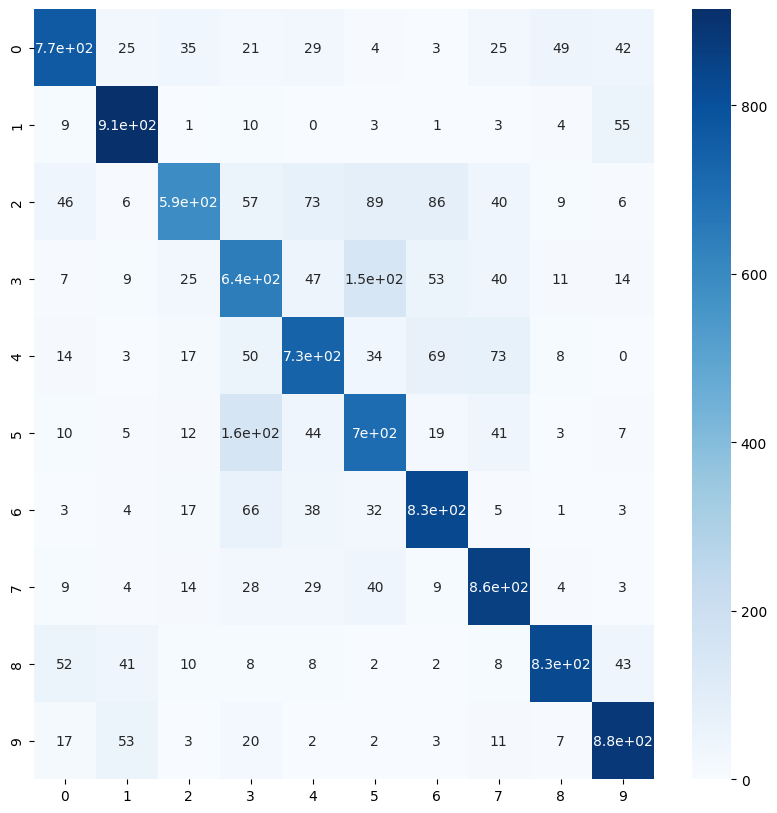

In [17]:
cf= confusion_matrix(test_labels, predicted_classes)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(cf, annot=True, cmap='Blues', ax=ax)
plt.show()

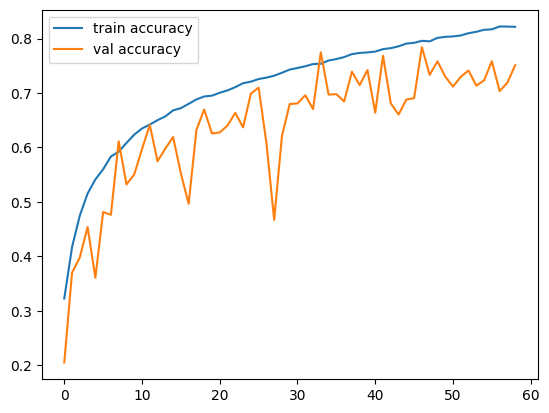

In [19]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

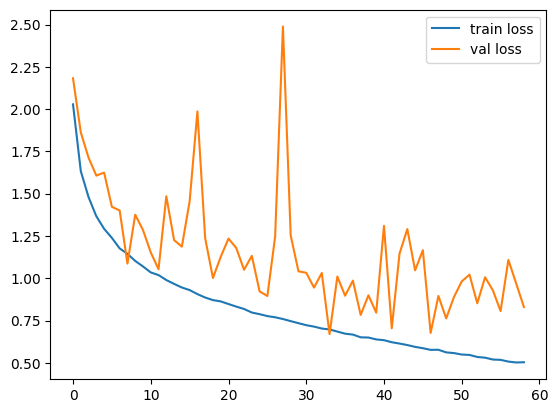

In [20]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

## Comment
### Dokładność na zbiorze trenującym -> 82%
### Dokładność na zbiorze testowym -> 77 %
### W procesie uczenia wystąpiło zjawisko overfittingu. Stosunkowo niewielki model miał problem z trenowananiem na co wskazują duże amplituty odchyleń w kolejnych epokach uczenia